In [32]:
# Initial imports.
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
#  Import and read the csv.
data_df = pd.read_csv("Resources/sample_data.csv")
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


### Preprocessing the data

In [4]:
# Drop the null columns where all values are null
data_df = data_df.dropna(axis='columns', how='all')

In [5]:
# Drop the null rows
data_df = data_df.dropna()

In [6]:
# Using drop() to delete rows based on column value
data_df.drop(data_df[data_df['Year'] < 2019].index, inplace = True)

In [7]:
# Dropping "C_S" due to FIPS representing the same information
# also removes a categorical variables
data_df = data_df.drop(columns=["C_S", "FIPS","month"])

In [8]:
# Define the features set.
X = data_df.copy()
X = X.drop("Cost", axis=1)

# Define the target set.
y = data_df["Cost"].ravel()

In [9]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [10]:
# Creating a StandardScaler instance.
scaler = StandardScaler()

# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=22) 

In [12]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [13]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([146743, 213613, 124383, 213733, 169895, 143288, 132082, 104655,
       275912, 146743, 124383, 104655, 107882, 146743, 146743, 203439,
       124383, 202351, 108089, 104655, 251728, 107882, 161921, 203439,
       165821, 202351, 108089, 119515, 202351, 204620, 226542, 150914,
       213784, 227802, 175811, 104655], dtype=int64)

In [14]:
y_test

array([150610, 217601, 123081, 219848, 171950, 143538, 134398, 106457,
       278810, 146402, 121689, 105664, 107834, 143665, 147699, 205927,
       125674, 194970, 109595, 104117, 241056, 107688, 163731, 201698,
       167795, 200071, 108820, 117599, 202020, 205471, 225005, 152008,
       214924, 229609, 173980, 107772], dtype=int64)

In [29]:
data={"Actual_Price":y_test, "Price_Prediction": predictions}
predictions_df = pd.DataFrame(data=data)
predictions_df.head()

,Actual_Price,Price_Prediction
0,150610,146743
1,217601,213613
2,123081,124383
3,219848,213733
4,171950,169895


In [30]:
predictions_df.corr()

,Actual_Price,Price_Prediction
Actual_Price,1.00000,0.99798
Price_Prediction,0.99798,1.00000


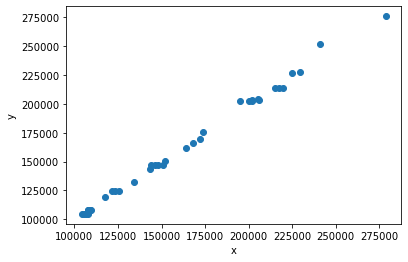

In [37]:
plt.scatter(predictions_df.Actual_Price, predictions_df.Price_Prediction)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [38]:
# reshaping the feature
X = predictions_df.Actual_Price.reshape(-1, 1)

AttributeError: 'Series' object has no attribute 'reshape'

In [23]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    #cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
    cm)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

cm_df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Accuracy Score : 0.0
Classification Report
              precision    recall  f1-score   support

      104117       0.00      0.00      0.00       1.0
      104655       0.00      0.00      0.00       0.0
      105664       0.00      0.00      0.00       1.0
      106457       0.00      0.00      0.00       1.0
      107688       0.00      0.00      0.00       1.0
      107772       0.00      0.00      0.00       1.0
      107834       0.00      0.00      0.00       1.0
      107882       0.00      0.00      0.00       0.0
      108089       0.00      0.00      0.00       0.0
      108820       0.00      0.00      0.00       1.0
      109595       0.00      0.00      0.00       1.0
      117599       0.00      0.00      0.00       1.0
      119515       0.00      0.00      0.00       0.0
      121689       0.00      0.00      0.00       1.0
      123081       0.00      0.00      0.00       1.0
      124383       0.00      0.00      0.00       0.0
      125674       0.00      0.00     

C:\Users\dog\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dog\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dog\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dog\anaconda